# The Singular Value Decomposition

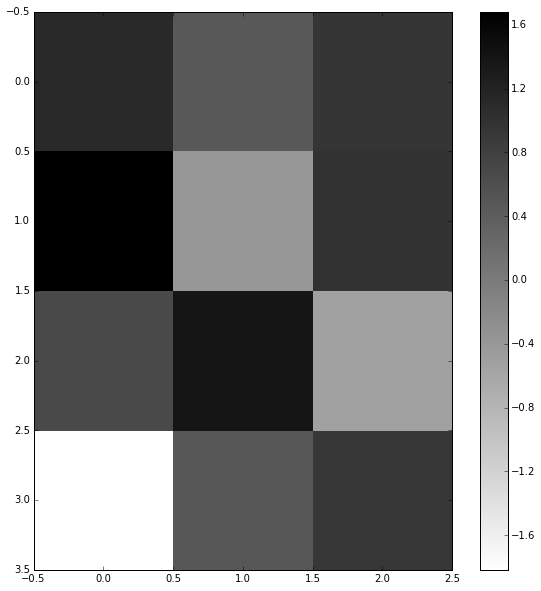

U
[[ -4.30055853e-01  -2.91454984e-01  -5.01394106e-01   6.91888651e-01]
 [ -6.41128923e-01  -4.78154351e-01  -4.72746330e-04  -6.00268188e-01]
 [ -2.08912526e-01   6.71027496e-01  -6.39867378e-01  -3.10881641e-01]
 [  6.00300944e-01  -4.85947023e-01  -5.82386010e-01  -2.53615462e-01]]
S
[ 2.80994852  1.72289053  1.56203337]
V
[[-0.99110334  0.01455449 -0.13229642]
 [ 0.12541662  0.43485819 -0.8917225 ]
 [ 0.04455162 -0.90038132 -0.43281478]]
A
[[ 1.09981386  0.46922351  0.9466237 ]
 [ 1.68215951 -0.38379509  0.97326459]
 [ 0.68227675  1.3941245  -0.52066827]
 [-1.81733962  0.4795555   0.91715478]]
A2
[[ 1.13470644 -0.23595003  0.60764562]
 [ 1.68219241 -0.38445997  0.97294498]
 [ 0.72680583  0.49419859 -0.95326413]
 [-1.77681073 -0.33952713  0.52342042]]


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.linalg as la

M = 4
N = 3
A = np.random.randn(M, N)

plt.figure(figsize=(10,10))
plt.imshow(A, interpolation='nearest', cmap='gray_r')
plt.colorbar()
plt.show()

U,S,Vt = la.svd(A)

print('U')
print(U)

print('S')
print(S)

print('V')
print(Vt)

rnk = 2

Sr = np.zeros_like(S)

Sr[0:rnk] = S[0:rnk]
Sig = la.diagsvd(Sr, M, N)

A2 = np.dot(np.dot(U, Sig), Vt)

print('A')
print(A)

print('A2')
print(A2)




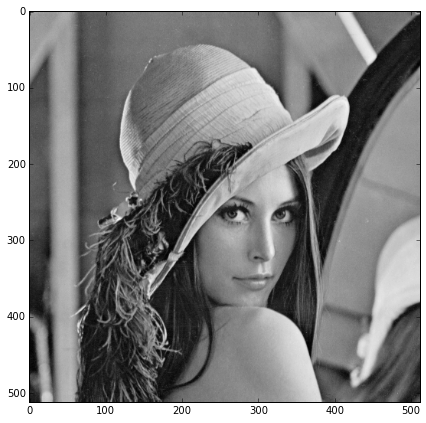

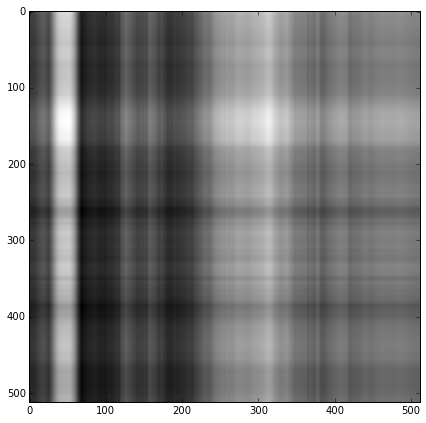

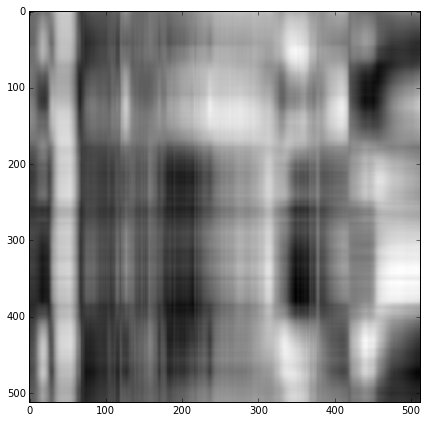

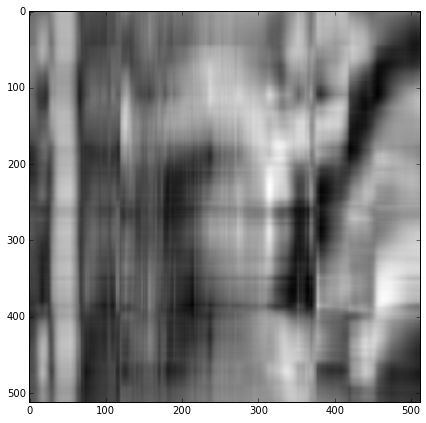

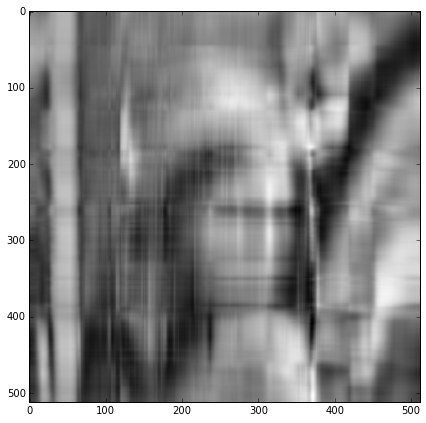

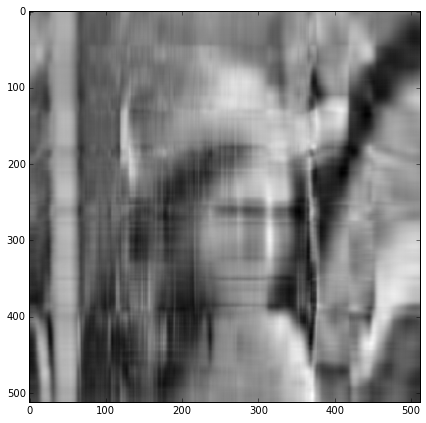

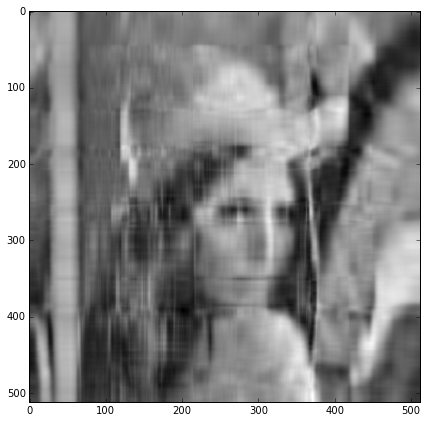

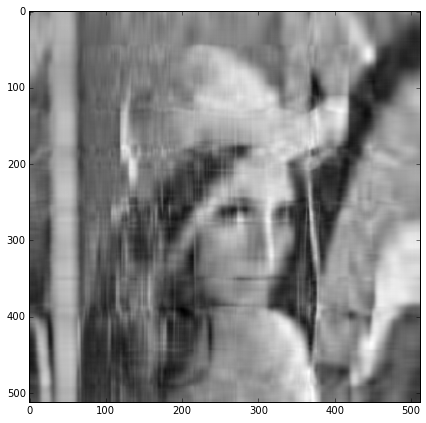

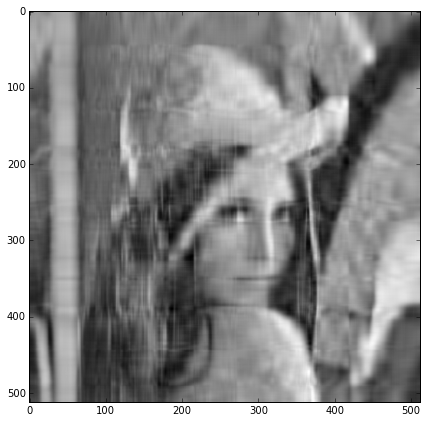

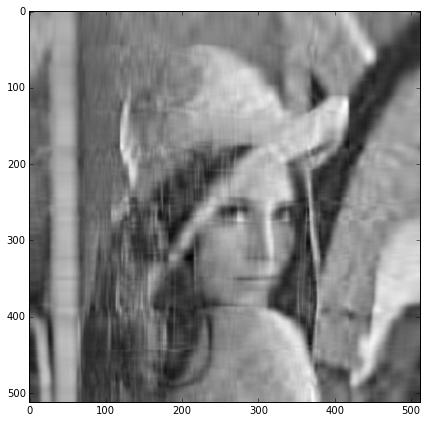

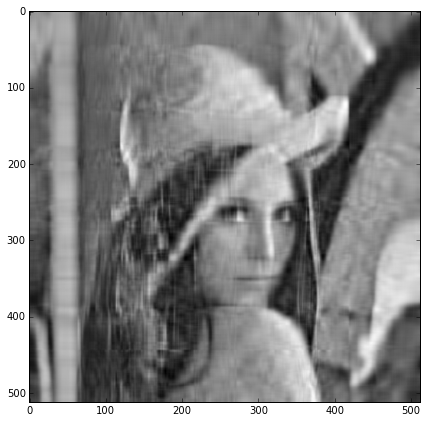

In [11]:
import scipy as sc
import scipy.misc

X = scipy.misc.lena()

fig = plt.figure(figsize=(7,7))
plt.gray()
plt.imshow(X)
plt.show()

U,S,Vt = la.svd(X)

M,N = X.shape

for rnk in range(1,20,2):

    Sr = np.zeros_like(S)

    Sr[0:rnk] = S[0:rnk]
    Sig = la.diagsvd(Sr, M, N)

    A2 = np.dot(np.dot(U, Sig), Vt)

    fig = plt.figure(figsize=(7,7))
    plt.gray()
    plt.imshow(A2)
    plt.show()
